In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np

from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
products = pd.read_csv('products.csv')
inventory = pd.read_csv('inventory.csv')
promotions = pd.read_csv('promotions.csv')
transactions = pd.read_csv('transactions.csv')

In [3]:
display(products)
display(inventory)
display(promotions)
display(transactions)

,category,product_id,description,size,std_sales_price,bio,basic
0,vegetable,v_1,Komkommer,1st,0.69,0,0
1,vegetable,v_2,Courgette,1st,0.75,0,0
2,vegetable,v_3,SnoepVegetable tomaat,500g,1.99,0,0
3,vegetable,v_4,Paprika Mix,3st,1.79,0,0
4,vegetable,v_5,Paprika,1st,0.99,0,0
5,vegetable,v_6,Geschrapte worteltjes,500g,1.59,0,0
6,vegetable,v_7,Basis Sperziebonen,680g,0.89,0,1
7,vegetable,v_8,Basis Rode kool met appel,660g,0.65,0,1
8,vegetable,v_9,Basis worteltjes fijn,680g,0.89,0,1
9,vegetable,v_10,Basis erwten zeer fijn,680g,0.97,0,1


,day,before or after delivery,Komkommer,Courgette,SnoepVegetable tomaat,Paprika Mix,Paprika,Geschrapte worteltjes,Basis Sperziebonen,Basis Rode kool met appel,...,Roomboter chocolade brood,Chinois brioche,Vanille muffins (vers),Basic chocolate chip cookies,Oreo,Bakkersspeculaas,Eierkoeken,Ribbelchips naturel,Ribbelchips paprika,Doritos sweet chili
0,0,before,[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
1,0,after,"[(14, 36)]","[(14, 8)]","[(14, 37)]","[(14, 33)]","[(14, 34)]","[(14, 35)]","[(14, 31)]","[(14, 35)]",...,"[(5, 19)]","[(5, 23)]","[(100, 130)]","[(100, 45)]","[(100, 131)]","[(100, 45)]","[(100, 125)]","[(100, 45)]","[(100, 44)]","[(100, 128)]"
2,3,before,"[(14, 13)]",[],"[(14, 13)]","[(14, 11)]",[],[],"[(14, 2)]","[(14, 12)]",...,[],[],"[(100, 3)]",[],"[(100, 19)]","[(100, 7)]","[(100, 8)]","[(100, 10)]","[(100, 11)]","[(100, 26)]"
3,3,after,"[(14, 13), (17, 36)]","[(17, 8)]","[(14, 13), (17, 37)]","[(14, 11), (17, 33)]","[(17, 34)]","[(17, 35)]","[(14, 2), (17, 31)]","[(14, 12), (17, 35)]",...,"[(8, 19)]","[(8, 23)]","[(100, 3), (103, 130)]","[(103, 45)]","[(100, 19), (103, 131)]","[(100, 7), (103, 45)]","[(100, 8), (103, 125)]","[(100, 10), (103, 45)]","[(100, 11), (103, 44)]","[(100, 26), (103, 128)]"
4,7,before,"[(17, 35)]",[],"[(17, 27)]","[(17, 17)]","[(17, 1)]","[(17, 13)]","[(17, 8)]","[(17, 32)]",...,[],[],"[(103, 26)]","[(103, 19)]","[(103, 55)]","[(103, 16)]","[(103, 39)]","[(103, 28)]","[(103, 19)]","[(103, 58)]"
5,7,after,"[(17, 35), (21, 36)]","[(21, 36)]","[(17, 27), (21, 37)]","[(17, 17), (21, 39)]","[(17, 1), (21, 34)]","[(17, 13), (21, 35)]","[(17, 8), (21, 31)]","[(17, 32), (21, 35)]",...,"[(12, 19)]","[(12, 20)]","[(103, 26), (107, 130)]","[(103, 19), (107, 45)]","[(103, 55), (107, 131)]","[(103, 16), (107, 45)]","[(103, 39), (107, 125)]","[(103, 28), (107, 45)]","[(103, 19), (107, 44)]","[(103, 58), (107, 128)]"
6,10,before,"[(17, 13), (21, 36)]","[(21, 14)]","[(21, 37)]",[],"[(21, 11)]","[(21, 23)]","[(21, 22)]","[(17, 16), (21, 35)]",...,[],"[(12, 9)]","[(107, 73)]","[(107, 43)]","[(107, 74)]","[(107, 29)]","[(107, 79)]","[(107, 37)]",[],"[(107, 73)]"
7,10,after,"[(17, 13), (21, 36), (24, 36)]","[(21, 14), (24, 36)]","[(21, 37), (24, 37)]","[(24, 39)]","[(21, 11), (24, 34)]","[(21, 23), (24, 35)]","[(21, 22), (24, 31)]","[(17, 16), (21, 35), (24, 35)]",...,"[(15, 19)]","[(12, 9), (15, 20)]","[(107, 73), (110, 130)]","[(107, 43), (110, 45)]","[(107, 74), (110, 131)]","[(107, 29), (110, 45)]","[(107, 79), (110, 125)]","[(107, 37), (110, 45)]","[(110, 44)]","[(107, 73), (110, 128)]"
8,14,before,"[(21, 24), (24, 36)]","[(24, 21)]","[(21, 15), (24, 37)]",[],"[(24, 5)]","[(24, 30)]","[(21, 9), (24, 31)]","[(21, 29), (24, 35)]",...,[],"[(15, 10)]","[(110, 86)]","[(107, 9), (110, 45)]","[(110, 101)]","[(107, 10), (110, 45)]","[(110, 116)]","[(107, 16), (110, 45)]",[],"[(110, 86)]"
9,14,after,"[(21, 24), (24, 36), (28, 36)]","[(24, 21), (28, 36)]","[(21, 15), (24, 37), (28, 15)]","[(28, 33)]","[(24, 5), (28, 14)]","[(24, 30), (28, 35)]","[(21, 9), (24, 31), (28, 31)]","[(21, 29), (24, 35), (28, 35)]",...,"[(19, 19)]","[(15, 10), (19, 20)]","[(110, 86), (114, 130)]","[(107, 9), (110, 45), (114, 45)]","[(110, 101), (114, 131)]","[(107, 10), (110, 45), (114, 45)]","[(110, 116), (114, 125)]","[(107, 16), (110, 45), (114, 27)]","[(114, 44)]","[(110, 86), (114, 128)]"


,week,category,product_id,description,discount
0,1,vegetable,v_14,Biologische knoflook,30
1,1,vegetable,v_2,Courgette,5
2,1,vegetable,v_16,Biologische kikkererwten,10
3,1,vegetable,v_12,Biologische courgette,15
4,1,bread,b_41,Chinois brioche,30
5,1,bread,b_40,Roomboter chocolade brood,25
6,1,bread,b_15,Vloerbrood volkoren,30
7,1,vegetable,v_15,Biologische pompoen,30
8,1,vegetable,v_26,Snijbonen,35
9,1,meat,m_18,Varkensbraadworst,20


,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic
0,1/1/2018,9:07:00,0.0,NaN,snack,s_5,Eierkoeken,4st,1.79,1.79,0.0,0.0
1,1/1/2018,9:07:00,0.0,NaN,meat,m_16,Sappige gelders rookworst,250g,1.08,1.08,0.0,0.0
2,1/1/2018,9:07:00,0.0,NaN,meat,m_18,Varkensbraadworst,4st,2.49,1.99,NaN,0.0
3,1/1/2018,9:07:00,0.0,NaN,meat,m_6,Half om half gehakt,500g,2.69,2.42,0.0,0.0
4,1/1/2018,9:07:00,0.0,NaN,bread,b_33,Biologisch bruin heel,1st,2.12,2.12,1.0,0.0
5,1/1/2018,9:07:00,0.0,NaN,meat,m_9,Mini biefstukjes,180g,2.39,2.39,0.0,0.0
6,1/1/2018,9:07:00,0.0,NaN,snack,s_1,Vanille muffins (vers),1st,3.07,3.07,0.0,0.0
7,1/1/2018,9:07:00,0.0,NaN,meat,m_13,Mini gourmet kipsatespiesjes,200g,2.49,2.49,0.0,0.0
8,1/1/2018,9:07:00,0.0,NaN,vegetable,v_21,Boerenkool gesneden,300g,1.29,1.29,0.0,0.0
9,1/1/2018,9:07:00,0.0,NaN,fruit,f_7,Pitloze rode druiven,500g,2.19,2.19,0.0,0.0


In [4]:
transactions['day'] = pd.to_datetime(transactions['day'])

In [5]:
summer = transactions[transactions['day'].dt.month.between(6,8)]
winter_1 = transactions[transactions['day'].dt.month.between(12,12)]
winter_2 = transactions[transactions['day'].dt.month.between(1,2)]
spring = transactions[transactions['day'].dt.month.between(3,5)]
fall = transactions[transactions['day'].dt.month.between(9,11)]

winter_frames = [winter_1, winter_2]
winter = pd.concat(winter_frames)

In [6]:
transactions['category']

0             snack
1              meat
2              meat
3              meat
4             bread
5              meat
6             snack
7              meat
8         vegetable
9             fruit
10            fruit
11            fruit
12        vegetable
13            bread
14            bread
15        vegetable
16            fruit
17            bread
18            fruit
19            fruit
20            fruit
21            snack
22             meat
23             meat
24             meat
25        vegetable
26             meat
27        vegetable
28             meat
29            snack
            ...    
354835    vegetable
354836         meat
354837        bread
354838        bread
354839        fruit
354840        fruit
354841         meat
354842    vegetable
354843        fruit
354844         meat
354845    vegetable
354846        fruit
354847        bread
354848         meat
354849        fruit
354850    vegetable
354851         meat
354852        snack
354853    vegetable


In [7]:
for x in range(1,12):
    df = transactions[pd.to_datetime(transactions['day']).dt.month == x]
    df1 = transactions[pd.to_datetime(transactions['day']).dt.month == x-1]
    a = df.groupby('description').count().head(10).sort_values(by='day', ascending=False)
    b = df1.groupby('description').count().head(10).sort_values(by='day', ascending=False)
    print(a.merge(b))

Empty DataFrame
Columns: [day, time, customer, bank acount, category, product_id, size, std_sales_price, purchase_price, bio, basic]
Index: []
Empty DataFrame
Columns: [day, time, customer, bank acount, category, product_id, size, std_sales_price, purchase_price, bio, basic]
Index: []
Empty DataFrame
Columns: [day, time, customer, bank acount, category, product_id, size, std_sales_price, purchase_price, bio, basic]
Index: []
Empty DataFrame
Columns: [day, time, customer, bank acount, category, product_id, size, std_sales_price, purchase_price, bio, basic]
Index: []
Empty DataFrame
Columns: [day, time, customer, bank acount, category, product_id, size, std_sales_price, purchase_price, bio, basic]
Index: []
Empty DataFrame
Columns: [day, time, customer, bank acount, category, product_id, size, std_sales_price, purchase_price, bio, basic]
Index: []
Empty DataFrame
Columns: [day, time, customer, bank acount, category, product_id, size, std_sales_price, purchase_price, bio, basic]
Index: []

In [8]:
df = transactions[pd.to_datetime(transactions['day']).dt.month == 1]
df1 = transactions[pd.to_datetime(transactions['day']).dt.month == 2]
a = df.groupby('description').count().head(10).sort_values(by='day', ascending=False)
a = a.reset_index()
b = df1.groupby('description').count().head(10).sort_values(by='day', ascending=False)
b = b.reset_index()

s1 = pd.merge(a, b, how='inner', on=['description'])
s1

,description,day_x,time_x,customer_x,bank acount_x,category_x,product_id_x,size_x,std_sales_price_x,purchase_price_x,...,time_y,customer_y,bank acount_y,category_y,product_id_y,size_y,std_sales_price_y,purchase_price_y,bio_y,basic_y
0,Basic chocolate chip cookies,311,309,310,293,309,311,311,311,311,...,286,286,268,286,286,286,285,285,286,286
1,Bakkersspeculaas,308,307,308,295,308,308,307,308,308,...,315,315,293,314,315,315,315,313,315,315
2,Basic meergranen heel,236,236,234,213,236,235,236,236,236,...,183,182,172,183,183,183,183,183,183,183
3,Basic roggebrood,232,232,231,208,232,232,231,232,232,...,191,192,176,192,192,191,192,192,192,192
4,Basic casino half,222,222,222,204,222,222,222,222,222,...,192,192,164,192,192,192,192,192,192,191
5,Bananen,220,220,220,180,219,220,219,220,220,...,159,159,130,159,159,159,159,157,157,159
6,Aardbeien,190,190,190,149,190,190,190,190,190,...,194,194,162,193,194,194,194,194,194,194
7,Aardbeien ontkroond,183,183,183,157,183,182,183,183,183,...,203,203,166,203,203,203,203,203,202,202
8,Amandelkrans,175,175,174,145,175,175,175,175,175,...,148,149,130,149,149,149,149,149,149,149
9,Atkins laag koolhydraat volkoren brood half,113,113,112,96,113,113,113,113,113,...,140,139,122,140,140,140,140,140,140,140


In [9]:

for x in range(0,12):
    df = transactions[pd.to_datetime(transactions['day']).dt.month == x]
    


<Figure size 7200x7200 with 0 Axes>

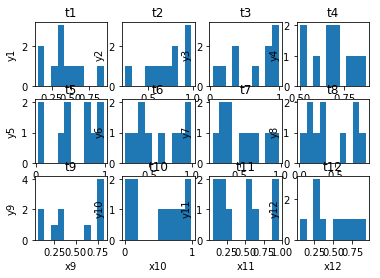

<Figure size 7200x7200 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import numpy as np

data=np.random.random((12,10))
xaxes = ['x1','x2','x3','x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']
yaxes = ['y1','y2','y3','y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12']
titles = ['t1','t2','t3','t4', 't5','t6','t7','t8', 't9','t10','t11','t12'] 

f,a = plt.subplots(3,4)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(data[idx])
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    
plt.figure(figsize=(100,100))

In [11]:
transactions['description'].dropna()

transactions[transactions['size'].str.contains("g",  na = False)]

cona = transactions[transactions['size'].str.contains("kg",  na = False)]

cona['size'] = cona['size'].str.replace('kg', '').astype('float32')*1000//1
cona['size'] = cona['size'].astype('int32')
cona['size'] = cona['size'].astype('str')
cona['size'] = cona['size'].str.replace('0 ', 'g')
cona['size'] = (cona['size'].astype(str) + 'g')


cona

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic
10,2018-01-01,9:07:00,0.0,NaN,fruit,f_21,Granny smith,1500g,3.19,3.19,0.0,0.0
11,2018-01-01,9:07:00,0.0,NaN,fruit,f_21,Granny smith,1500g,3.19,3.19,0.0,0.0
12,2018-01-01,9:07:00,0.0,NaN,vegetable,v_32,Buitenbeentjes komkommer,1000g,1.99,1.99,0.0,0.0
16,2018-01-01,9:50:08,1.0,NaN,fruit,f_17,Mandarijnen groot,1500g,2.99,2.99,0.0,0.0
18,2018-01-01,9:50:08,1.0,NaN,fruit,f_9,Conference,1000g,1.79,1.79,0.0,0.0
19,2018-01-01,9:50:08,1.0,NaN,fruit,f_1,Mandarijenen,1000g,1.99,1.99,0.0,0.0
20,2018-01-01,9:50:08,1.0,NaN,fruit,f_21,Granny smith,1500g,3.19,3.19,0.0,0.0
37,2018-01-01,9:59:31,2.0,72461338.0,vegetable,v_32,Buitenbeentjes komkommer,1000g,1.99,1.99,0.0,0.0
63,2018-01-01,10:25:31,4.0,304428.0,vegetable,v_33,Buitenbeentjes paprika,1000g,2.99,2.99,0.0,0.0
105,2018-01-01,10:44:42,7.0,56401558.0,fruit,f_9,Conference,1000g,1.79,1.79,0.0,0.0


In [12]:
transactions[transactions['category'] == 'vegetable']['description'].unique

<bound method Series.unique of 8                Boerenkool gesneden
12          Buitenbeentjes komkommer
15               Nasi bami Vegetable
25             Basis worteltjes fijn
27                         Courgette
37          Buitenbeentjes komkommer
42             SnoepVegetable tomaat
44             Geschrapte worteltjes
45                         Snijbonen
48                         Courgette
49             Basis worteltjes fijn
52             Geschrapte worteltjes
56        Buitenbeentjes puntpaprika
61               Nasi bami Vegetable
62                         Snijbonen
63            Buitenbeentjes paprika
66                Basis sperziebonen
80                         Snijbonen
89                         Komkommer
90                          Spruiten
92                         Courgette
94               Boerenkool gesneden
100                        Snijbonen
102                         Wortelen
103                Basis Maiskorrels
104                Basis Maiskorrels
106    

In [13]:
transactions[transactions['description'] == 'Rundergehakt']
transactions[(transactions['description'] == 'Blauwe bessen')]

,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic
32,2018-01-01,9:59:31,2.0,72461338.0,fruit,f_13,Blauwe bessen,150g,2.45,2.45,0.0,0.0
437,2018-01-01,14:17:44,25.0,76418452.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
464,2018-01-01,14:21:35,26.0,51433968.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
533,2018-01-01,15:17:34,30.0,62745341.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
653,2018-01-01,16:13:24,37.0,77943433.0,fruit,f_13,Blauwe bessen,150g,2.45,2.45,0.0,0.0
658,2018-01-01,16:13:24,37.0,77943433.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
674,2018-01-01,16:21:38,38.0,73981789.0,fruit,f_13,Blauwe bessen,150g,2.45,2.45,0.0,0.0
950,2018-01-01,18:57:06,53.0,99624742.0,fruit,f_13,Blauwe bessen,150g,2.45,2.45,0.0,0.0
956,2018-01-01,18:57:06,53.0,99624742.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
1133,2018-01-01,20:50:31,62.0,48000603.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0


In [14]:




for x in list(transactions[transactions['category'] == 'meat']['description'].unique()):
    print(transactions[transactions['description'] == x]['purchase_price'].unique(),transactions[transactions['description'] == x]['description'].unique())

[1.08 0.7   nan 0.81 0.86] ['Sappige gelders rookworst']
[1.99 2.49 2.37 1.87 1.62 2.12] ['Varkensbraadworst']
[2.42 2.56 2.69 2.29 1.88 2.02] ['Half om half gehakt']
[2.39 2.15 1.91  nan 2.27] ['Mini biefstukjes']
[2.49 1.99  nan] ['Mini gourmet kipsatespiesjes']
[1.29 1.23 0.84 0.97 1.16  nan] ['Mini gourmet hamburgers']
[3.99 2.99 3.39  nan 3.79 3.59] ['Mager rundergehakt']
[3.19 2.87 2.71 2.07  nan] ['Veluwse rookworst fijn']
[3.39 3.22 2.37 2.71] ['Unox Magere rookworst']
[3.39 2.71 2.54 2.2  3.05  nan 2.88 3.22 2.37] ['Spekblokjes']
[2.47 2.35 1.61 1.73 1.98  nan] ['rundervinken']
[2.39  nan 1.55 1.67 2.15 1.91 1.79 2.27] ['Gerookte spekreepjes']
[5.89 5.6  5.3   nan 4.71 3.83] ['Runder riblap Iers']
[3.39 2.88  nan 2.37] ['Spekreepjes']
[2.39 1.67 1.91 2.27] ['Mini gourmet varkenshaas']
[2.99  nan 2.09 1.94 2.84 2.39 2.24] ['Hamburgers']
[3.49 3.14 2.27 2.97 2.44] ['Krokante Kipfiletschnitzel']
[3.25 2.11 3.09 2.6 ] ['Kipfilet']
[4.31 4.79 3.35 3.83] ['Kipfilet naturel']
[3.31 2

In [15]:




for x in list(transactions[transactions['category'] == 'fruit']['description'].unique()):
    print(transactions[transactions['description'] == x].groupby('category').count()['description'])

category
fruit    2304
Name: description, dtype: int64
category
fruit    2227
Name: description, dtype: int64
category
fruit    2504
Name: description, dtype: int64
category
fruit    2426
Name: description, dtype: int64
category
fruit    2352
Name: description, dtype: int64
category
fruit    4659
Name: description, dtype: int64
category
fruit    12364
Name: description, dtype: int64
category
fruit    2184
Name: description, dtype: int64
category
fruit    2210
Name: description, dtype: int64
category
fruit    2146
Name: description, dtype: int64
category
fruit    2237
Name: description, dtype: int64
category
fruit    2219
Name: description, dtype: int64
category
fruit    2248
Name: description, dtype: int64
category
fruit    2225
Name: description, dtype: int64
category
fruit    2144
Name: description, dtype: int64
category
fruit    2477
Name: description, dtype: int64
category
fruit    2185
Name: description, dtype: int64
category
fruit    2383
Name: description, dtype: int64
category


In [16]:
transactions[transactions['description'] == 'Blauwe bessen']['size'].unique()

transacion_size_blue = transactions[(transactions['description'] == 'Blauwe bessen')].groupby('size').count()
transacion_purchase_price_blue = transactions[(transactions['description'] == 'Blauwe bessen') & (transactions['size'] == '300g')]
transacion_purchase_price_blue_group = transactions[(transactions['description'] == 'Blauwe bessen')  & (transactions['size'] == '150g')].groupby('purchase_price').count()

transacion_purchase_price_blue_group
transacion_purchase_price_blue


,day,time,customer,bank acount,category,product_id,description,size,std_sales_price,purchase_price,bio,basic
437,2018-01-01,14:17:44,25.0,76418452.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
464,2018-01-01,14:21:35,26.0,51433968.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
533,2018-01-01,15:17:34,30.0,62745341.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
658,2018-01-01,16:13:24,37.0,77943433.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
956,2018-01-01,18:57:06,53.0,99624742.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
1133,2018-01-01,20:50:31,62.0,48000603.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
1145,2018-01-01,20:50:31,62.0,48000603.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
1250,2018-02-01,10:37:19,69.0,NaN,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
1298,2018-02-01,11:52:46,73.0,61836671.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0
1717,2018-02-01,18:23:54,98.0,43420043.0,fruit,f_14,Blauwe bessen,300g,4.25,4.25,0.0,0.0


In [17]:

transactions[transactions['description'] == 'Rundergehakt']['size'].unique()
#transacion_size_beef = transactions[(transactions['description'] == 'Rundergehakht')].groupby('size').count()
#transacion_purchase_price_beef = transactions[(transactions['description'] == 'Rundergehakht') & (transactions['size'] == '300g')]
#transacion_purchase_price_beef_group = transactions[(transactions['description'] == 'Rundergehakht')].groupby('purchase_price').count()


array(['300g ', '500g', nan], dtype=object)

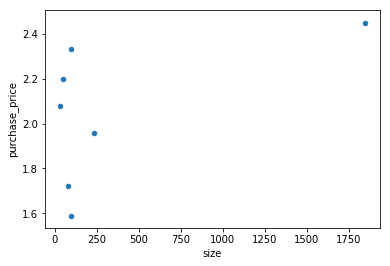

In [18]:

transacion_purchase_price_blue_group.reset_index().plot.scatter(x='size', y='purchase_price')

In [19]:
for x in range(0,12):
    (transacion_purchase_price_blue[pd.to_datetime(transacion_purchase_price_blue['day']).dt.month == x])

In [20]:
transacion_purchase_price_blue[pd.to_datetime(transacion_purchase_price_blue['day']).resample('M').mean()]

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [21]:
transactions[transactions['description'] == x]['purchase_price'].unique()

array([], dtype=float64)

## OLS Regression
#### Price Elasticity and Statistical Modelling for profit maximisation

In [22]:
blue_berry_model = ols("size ~ std_sales_price", data=transacion_purchase_price_blue_group).fit()
print(blue_berry_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   size   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.742e+08
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           4.74e-20
Time:                        09:18:51   Log-Likelihood:                 5.9165
No. Observations:                   7   AIC:                            -7.833
Df Residuals:                       5   BIC:                            -7.941
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1638      0.053     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


#### An R-squared of 1 means that all movements of a security (or another dependent variable) are completely explained by movements in the index (or the independent variable(s) you are interested in)

# Demand Function
## Q = -0.1638 + 1.0017*P


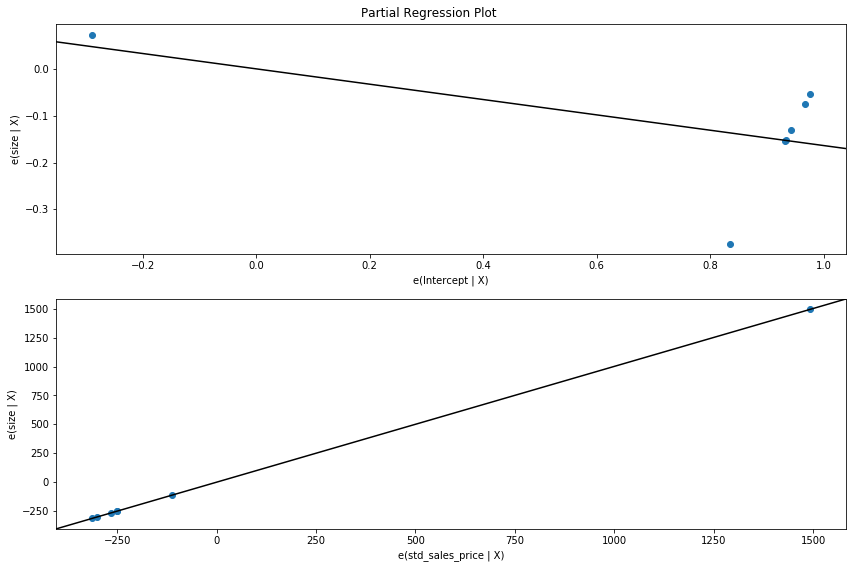

In [23]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(blue_berry_model, fig=fig)

### P value of 0 suggests failure to reject the null hypothesis at 0.05 significance level, suggesting that the price has no effect on the quantity demanded.
### We can see there is a negative trend for the intercept and there is a positive trend for the price and the quantity demanded. This suggests that blueberries do not follow the law of demand

## Component-Component plus Residual Plot

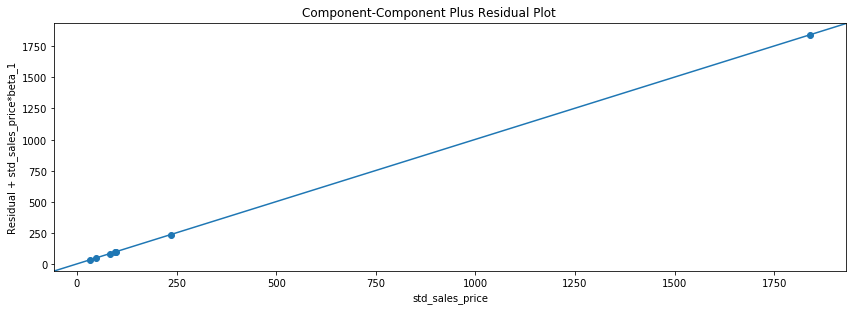

In [24]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(blue_berry_model, fig=fig)

#### The CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the effects of the other independent variables. The relationship is linear and positive.

## Regression plots

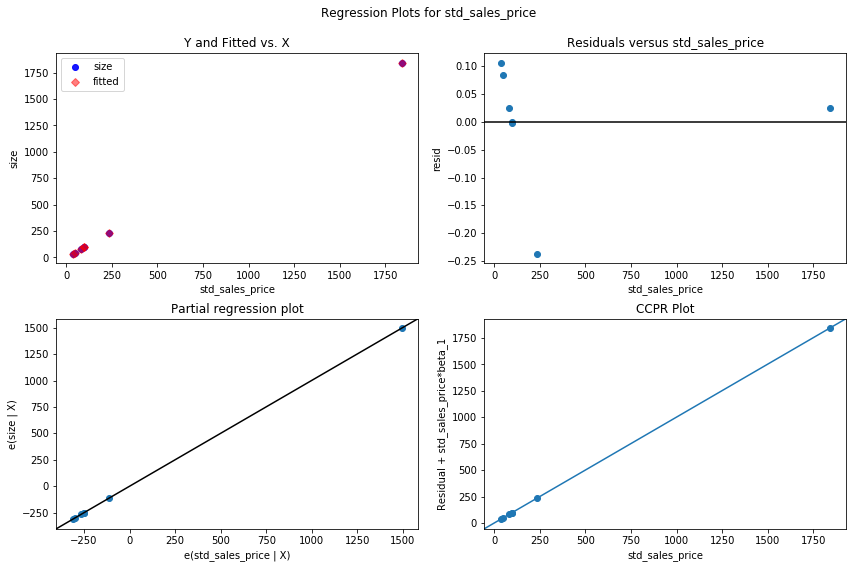

In [25]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(blue_berry_model, 'std_sales_price', fig=fig)

## Regression plots
#### To investigative parameter stability

In [26]:
endog = transacion_purchase_price_blue_group['size']
exog = sm.add_constant(transacion_purchase_price_blue_group['std_sales_price'])
mod = sm.RecursiveLS(endog, exog)
res = mod.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                   size   No. Observations:                    7
Model:                    RecursiveLS   Log Likelihood                  -2.356
Date:                Thu, 11 Mar 2021   AIC                              8.711
Time:                        09:20:00   BIC                              7.930
Sample:                             0   HQIC                             6.615
                                  - 7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1638      0.054     -3.057      0.002      -0.269      -0.059
std_sales_price     1.0017   7.59e-05   1.32e+04      0.000       1.002       1.002
Ljung-Box (Q):                  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


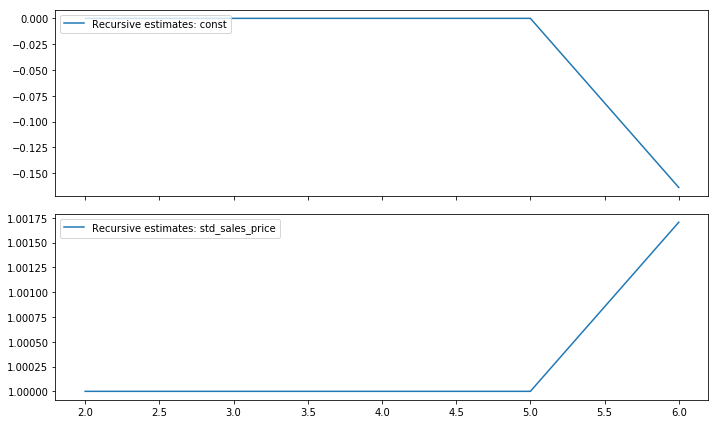

In [27]:
res.plot_recursive_coefficient(range(mod.k_exog), alpha=None, figsize=(10,6));

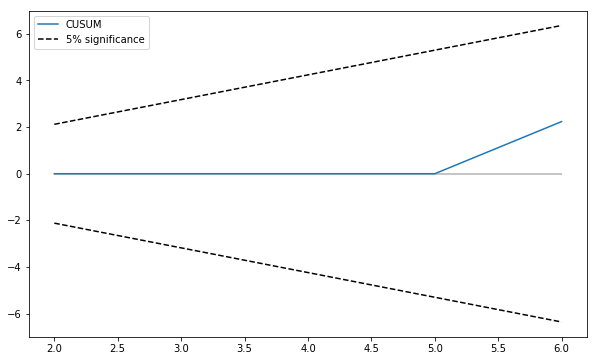

In [28]:
fig = res.plot_cusum(figsize=(10,6));

#### Fails to reject the nul of stable parameter, hence the price parameter is stable